In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('spam.csv')     cannot be used due to utf-8' codec can't decode bytes
df = pd.read_csv('spam.csv', encoding='latin1') 

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
656,ham,Sun cant come to earth but send luv as rays. c...,NaN,NaN,NaN
4337,ham,Yes when is the appt again?,NaN,NaN,NaN
687,ham,"Dear,Me at cherthala.in case u r coming cochin...",NaN,NaN,NaN
2827,ham,Wife.how she knew the time of murder exactly,NaN,NaN,NaN
4563,ham,Tell me again what your address is,NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Imporvement
# 7. Website 
# 8. Deploy

## 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Target mapping to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [11]:
# Duplicated values
df.duplicated().sum()
df.shape

(5572, 2)

In [12]:
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(5169, 2)


## 2. EDA

In [13]:
df.Target.value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

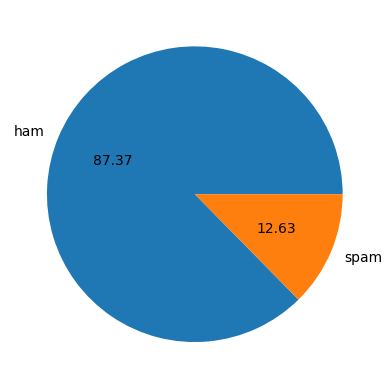

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
# Data is imbalanced

In [16]:
df['num_char'] = df['text'].apply(len)
df.head()

,Target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# !pip install nltk
# nltk.download('punkt')


In [18]:
import nltk

df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df.head()

,Target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,Target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# ham
df[df['Target']==0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# spam
df[df['Target']==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

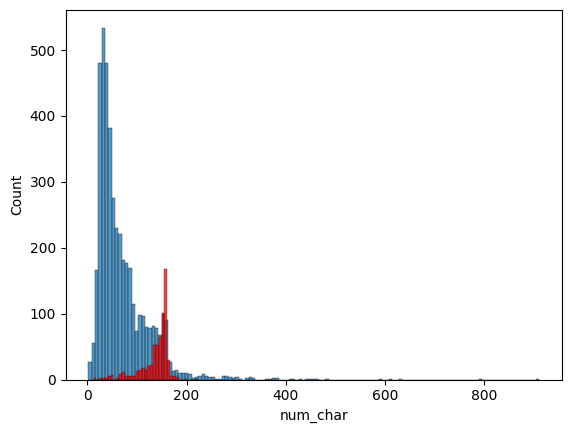

In [25]:
import seaborn as sns

sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'],color='red')

# the spam messages have large number of characters used

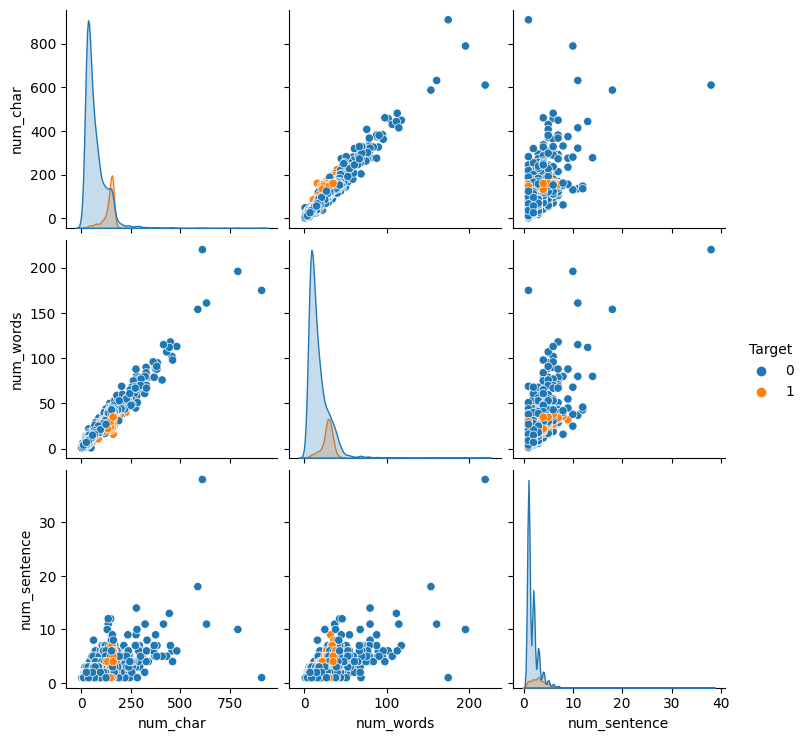

In [26]:
sns.pairplot(df,hue='Target')

<Axes: >

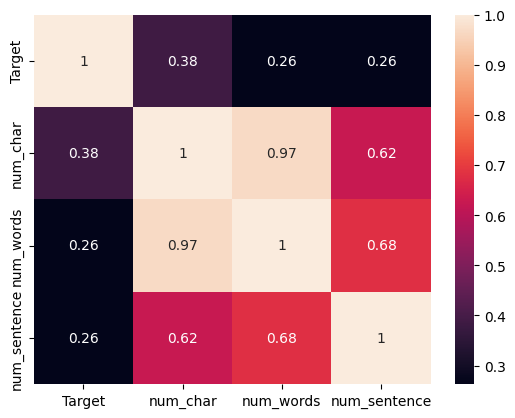

In [27]:
# sns.heatmap(df.corr(),annot=True)
# df.head()
sns.heatmap(df[['Target','num_char','num_words','num_sentence']].corr(),annot=True)

## 3. Data Preprocessing

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
# common english stopwords
import string

english_stopwords = [
    "a", "about", "above", "after", "again", "against", "ain't", "all", "am", "an", "and", "any", "are", "aren't",
    "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't",
    "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during",
    "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he",
    "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's",
    "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's",
    "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or",
    "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll",
    "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs",
    "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've",
    "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd",
    "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's",
    "which", "while", "who", "who's", "whom", "why", "why's", "will", "with", "won't", "would", "wouldn't",
    "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"
]

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_txt(text):
    # Lower case
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
     
    # Removing stop words and punctuations
    text = y[:] # we have to clone the list 
    y.clear()
    for i in text:
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    # stemming --> reducing the words to their stem form
    # ex: jumping --> jump
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [30]:

transform_txt(df['text'][400])

'free rington text first 87131 poli text get 87131 true tone help 0845 2814032 16 1st free tone txt stop'

In [31]:
df['transformed_text'] = df['text'].apply(transform_txt)

In [32]:
df.head()

,Target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
word_count = {}
for msg in df[df['Target']==1]['transformed_text'].tolist():
    words = msg.split()
    for word in words:
        # If the word is already in the dictionary, increment its count
        if word in word_count:
            word_count[word] += 1
        # If the word is not in the dictionary, initialize its count to 1
        else:
            word_count[word] = 1
    
    
    
# creating a map
print(word_count)
print(len(word_count))

{'free': 191, 'entri': 21, '2': 155, 'wkli': 9, 'comp': 8, 'win': 48, 'fa': 2, 'cup': 3, 'final': 14, 'tkt': 2, '21st': 1, 'may': 6, 'text': 122, '87121': 2, 'receiv': 31, 'question': 9, 'std': 6, 'txt': 141, 'rate': 26, 't': 58, 'c': 45, 'appli': 24, '08452810075over18': 1, 'freemsg': 14, 'hey': 5, 'darl': 2, '3': 20, 'week': 49, 'now': 164, 'word': 21, 'back': 20, 'like': 12, 'fun': 8, 'still': 5, 'tb': 1, 'ok': 5, 'xxx': 10, 'chg': 2, 'send': 60, 'rcv': 2, 'winner': 13, 'valu': 8, 'network': 26, 'custom': 42, 'select': 26, 'receivea': 1, 'prize': 82, 'reward': 9, 'claim': 98, 'call': 320, 'code': 27, 'kl341': 1, 'valid': 21, '12': 3, 'hour': 4, 'mobil': 114, '11': 3, 'month': 5, 'u': 119, 'r': 24, 'entitl': 6, 'updat': 14, 'latest': 30, 'colour': 14, 'camera': 23, 'co': 3, '08002986030': 1, 'six': 2, 'chanc': 22, 'cash': 51, '100': 14, 'pound': 19, 'csh11': 1, 'cost': 24, '6day': 1, 'tsandc': 1, 'repli': 103, 'hl': 3, '4': 97, 'info': 11, 'urgent': 57, 'won': 59, '1': 28, 'membershi

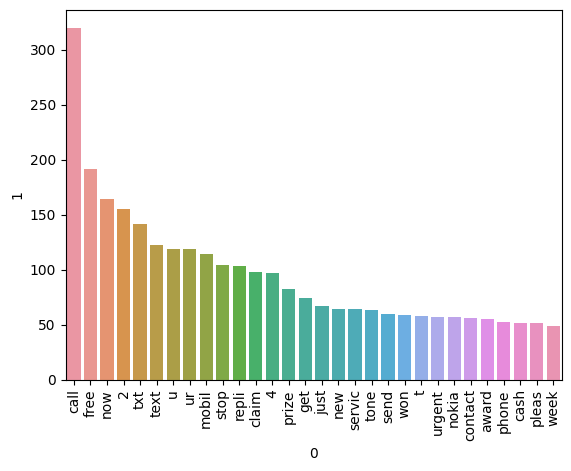

In [34]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(word_count).most_common(30))[0],y=pd.DataFrame(Counter(word_count).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

### i. Bag of words method

In [35]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

### ii. Tfidvectorizer

In [36]:
tfid = TfidfVectorizer()

In [37]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfid.fit_transform(df['transformed_text']).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X.shape
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

glb = GaussianNB()
mlb = MultinomialNB()
blb = BernoulliNB()


In [41]:
glb.fit(X_train,y_train)
y_pred1 = glb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [42]:
mlb.fit(X_train,y_train)
y_pred2 = mlb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9564796905222437
[[896   0]
 [ 45  93]]
1.0


In [43]:
blb.fit(X_train,y_train)
y_pred3 = blb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [44]:
# we can go with bernouli or multinomial naive bayes
# we will choose multinomail as precision is 1

# tfidf --> mlb

In [45]:
# model improve

# change max_features parameter of tfidf
tfid = TfidfVectorizer(max_features=3000)

X = tfid.fit_transform(df['transformed_text']).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
mlb = MultinomialNB()

mlb.fit(X_train,y_train)
y_pred2 = mlb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))



0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [46]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mlb,open('model.pkl','wb'))